In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uber=pd.read_csv('C:\\UpGrad\\EDA\\Uber Request Data.csv')

In [3]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


<h4>As we can see from the above output we have null values for driver id and drop time this is because when the cabs are not available their is no driver id for request and when driver cancel or no cab available their will be no drop time.</h4>

In [4]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


<h4>Timestamps are in not same format some have '/' and some have '-' we need to bring to proper format and then we need to derive the additional columns out of it for further analysis</h4>

In [89]:
uber.duplicated().sum()

0

<h5>We see that their are no duplicates.</h5>

In [6]:
np.unique(uber['Pickup point'])

array(['Airport', 'City'], dtype=object)

<h4>To see what are the pickup points and their is no redundant data.</h4>

In [7]:
uber[uber['Driver id']==0]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp


In [8]:
uber.loc[uber['Driver id'].isnull(),'Driver id']=0

In [9]:
uber.loc[uber['Driver id'].isnull()]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp


<h4>For convinience we substitute 0 as driver id for missing driver id's</h4>

In [10]:
np.unique(uber['Status'])

array(['Cancelled', 'No Cars Available', 'Trip Completed'], dtype=object)

In [11]:
uber['Request timestamp']=pd.to_datetime(uber['Request timestamp'],dayfirst=True)

<h4>Converting requsted timestamp in proper format.</h4>

In [12]:
np.unique(uber['Request timestamp'].map(lambda x:x.month))

array([7], dtype=int64)

In [158]:
np.unique(uber['Request timestamp'].map(lambda x:x.year))

array([2016], dtype=int64)

<h4>Month and year are only single value no need to create new columns for them</h4>

In [13]:
uber['req_day']=uber['Request timestamp'].map(lambda x:x.day)
uber['req_time']=uber['Request timestamp'].map(lambda x:x.time())

In [14]:
np.unique(uber['req_day'])

array([11, 12, 13, 14, 15], dtype=int64)

<h4>Extracting days and time.We see that only 5 days data is collected.</h4>

In [15]:
uber['req_hour']=uber['req_time'].map(lambda x:x.hour)

<h4>Below function is to get time from drop timestamp as most of values are NAN.</h4>

In [16]:
def date2int(t):
        try:
            t1=t.time()
            return t1
        except ValueError:
            return None

In [17]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_day,req_time,req_hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11/7/2016 13:00,11,11:51:00,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11/7/2016 18:47,11,17:57:00,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,12/7/2016 9:58,12,09:17:00,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12/7/2016 22:03,12,21:08:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,13,08:33:16,8


In [18]:
uber['Drop timestamp']=pd.to_datetime(uber['Drop timestamp'],dayfirst=True)

In [19]:
uber['drop_day']=uber['Drop timestamp'].map(lambda x:x.day)
uber['drop_time']=uber['Drop timestamp'].map(date2int)

In [20]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_day,req_time,req_hour,drop_day,drop_time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11:51:00,11,11.0,13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,11,17:57:00,17,11.0,18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,12,09:17:00,9,12.0,09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,12,21:08:00,21,12.0,22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,08:33:16,8,13.0,09:25:47


In [21]:
uber['drop_hour']=uber['drop_time'].map(lambda x:x.hour if x is not None else None)

In [22]:
uber['is_weekend']=uber['Request timestamp'].map(lambda x:1 if x.isoweekday()>5 else 0)

<h4>we can see from the below data all the cabs were requested on week days</h4>

In [23]:
uber[uber['is_weekend']==1]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_day,req_time,req_hour,drop_day,drop_time,drop_hour,is_weekend


In [24]:
uber.drop(['is_weekend'],inplace=True,axis=1)

In [25]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_day,req_time,req_hour,drop_day,drop_time,drop_hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11:51:00,11,11.0,13:00:00,13.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,11,17:57:00,17,11.0,18:47:00,18.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,12,09:17:00,9,12.0,09:58:00,9.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,12,21:08:00,21,12.0,22:03:00,22.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,08:33:16,8,13.0,09:25:47,9.0


In [26]:
uber['req_day'].astype('category').value_counts()

15    1381
11    1367
14    1353
13    1337
12    1307
Name: req_day, dtype: int64

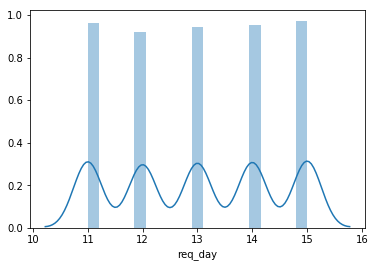

In [27]:
sns.distplot(uber['req_day'],hist=True)

<h4> we can see from the above graph that number of requests made on above dates are almost same.So the only thing we need to worry is time.</h4>

Text(0,0.5,'Frequency of request')

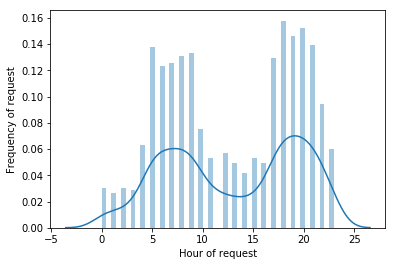

In [29]:
sns.distplot(uber['req_hour'],hist=True,bins=48)
plt.xlabel('Hour of request')
plt.ylabel('Frequency of request')

- from the above graph we can say that no of requests are higher from 4 to 12 and 16 to 23 hours

Text(0,0.5,'Frequency of drop')

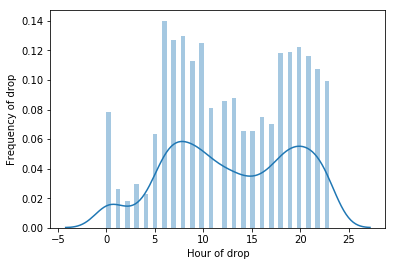

In [30]:
sns.distplot(uber.loc[~uber['drop_hour'].isnull(),'drop_hour'],hist=True,bins=48)
plt.xlabel('Hour of drop')
plt.ylabel('Frequency of drop')

- From the above plot we can figure out that number of drops are lower after 16 hour i,e 4pm compared to number of requests,this is where the cabs non availability or cancellation is likey to happen the most

Text(0,0.5,'Counts')

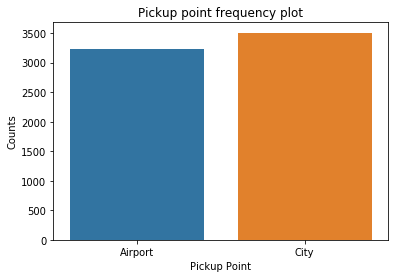

In [31]:
sns.barplot(x='Pickup point',y='Request id',estimator=np.count_nonzero,data=uber)
plt.title('Pickup point frequency plot')
plt.xlabel('Pickup Point')
plt.ylabel('Counts')

<h4>No of requests are more from city comapared to airport</h4>

Text(0,0.5,'Frequency of requests')

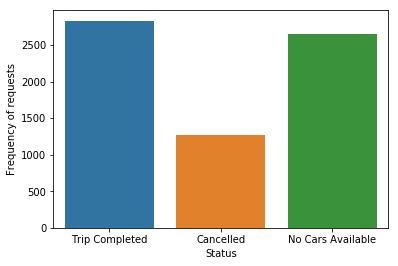

In [32]:
sns.barplot(x='Status',y='Request id',estimator=np.count_nonzero,data=uber)
plt.xlabel('Status')
plt.ylabel('Frequency of requests')

- we can clearly see from the above plot that no cabs available is causing more problem than driver cancelling the ride.

In [160]:
len(np.unique(uber.loc[uber['Driver id']!=0,'Driver id']))

300

- Their are 300 cabs available between city and airport as per given data.

In [34]:
uber.head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_day,req_time,req_hour,drop_day,drop_time,drop_hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11:51:00,11,11.0,13:00:00,13.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,11,17:57:00,17,11.0,18:47:00,18.0


In [36]:
from datetime import datetime,date,timedelta,time

<h4>Below function creats time slots based on the given time weather it's morning or evening etc</h4>

In [37]:
def slots(data):
    if data is not None:
        if data>=time(0,0,0) and data<=time(4,0,0):
            return 'late_night'
        elif data>time(4,0,0) and data<=time(8,0,0):
            return 'early_morning'
        elif data>time(8,0,0) and data<=time(12,0,0):
            return 'morning'
        elif data>time(12,0,0) and data<=time(16,0,0):
            return 'afternoon'
        elif data>time(16,0,0) and data<=time(20,0,0):
            return 'evening'
        else:
            return 'night'

In [38]:
uber['reqtime_slots']=uber['req_time'].map(slots)

In [39]:
uber['droptime_slots']=uber['drop_time'].map(slots)

In [236]:
uber.head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_day,req_time,req_hour,drop_day,drop_time,drop_hour,reqtime_slots,droptime_slots
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11:51:00,11,11.0,13:00:00,13.0,morning,afternoon
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,11,17:57:00,17,11.0,18:47:00,18.0,evening,evening


In [41]:
pd.pivot_table(uber,index=['Pickup point','reqtime_slots'],columns=['Status'],values=['Request id'],aggfunc=np.count_nonzero)

Request id                                 
Status                      Cancelled No Cars Available Trip Completed
Pickup point reqtime_slots                                            
Airport      afternoon           36.0              55.0          188.0
             early_morning       15.0              44.0          278.0
             evening             63.0             802.0          276.0
             late_night           NaN             114.0           67.0
             morning             24.0              34.0          242.0
             night               60.0             664.0          276.0
City         afternoon           33.0             127.0          213.0
             early_morning      527.0             263.0          327.0
             evening             42.0              82.0          296.0
             late_night          14.0             111.0           69.0
             morning            405.0             245.0          316.0
             night               45.0             109.0          283.0

Text(0,0.5,'Request frequency')

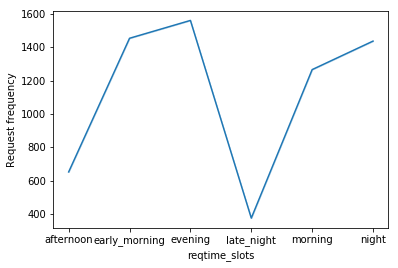

In [173]:
sns.lineplot('reqtime_slots','Request id',data=uber,estimator=np.count_nonzero)
plt.ylabel('Request frequency')

- from the above graph we can say that requests are more in early morning,morning,evening and night and least at afternnon and late night

Text(0,0.5,'Request frequency')

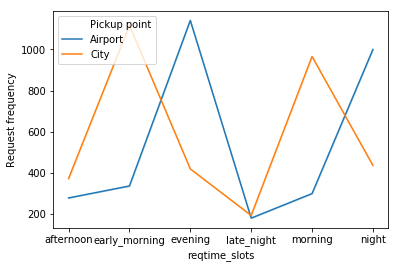

In [174]:
sns.lineplot('reqtime_slots','Request id',hue='Pickup point',data=uber,estimator=np.count_nonzero)
plt.ylabel('Request frequency')

- Requests are more in early morning and morning from city and evening and night from airport

<h4>Now we check weather it is happening for all the week days</h4>

Text(0,0.5,'Request frequency')

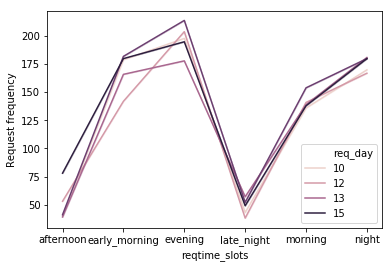

In [175]:
sns.lineplot(data=uber[uber['Status']!='Trip Completed'],x='reqtime_slots',y='Request id',hue='req_day',estimator=np.count_nonzero)
plt.ylabel('Request frequency')

Text(0,0.5,'Request frequency')

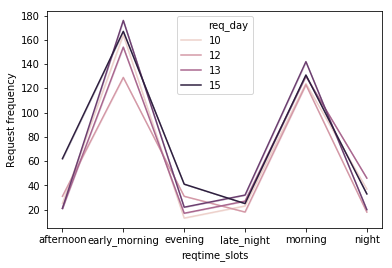

In [176]:
sns.lineplot(data=uber[(uber['Status']!='Trip Completed')&(uber['Pickup point']=='City')],x='reqtime_slots',y='Request id',hue='req_day',estimator=np.count_nonzero)
plt.ylabel('Request frequency')

Text(0,0.5,'Request frequency')

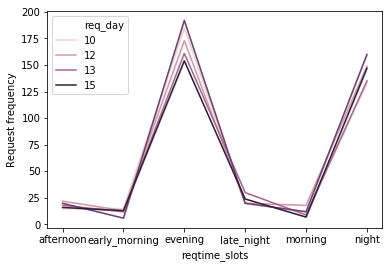

In [177]:
sns.lineplot(data=uber[(uber['Status']!='Trip Completed')&(uber['Pickup point']=='Airport')],x='reqtime_slots',y='Request id',hue='req_day',estimator=np.count_nonzero)
plt.ylabel('Request frequency')

<h4>From the above graphs we can say it is happening for all week days given</h4>

<h4>Now we break the problem further down to see what exactly is happening from Airport and City during those timings.</h4>

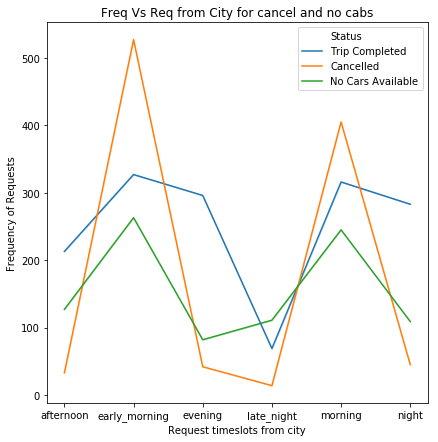

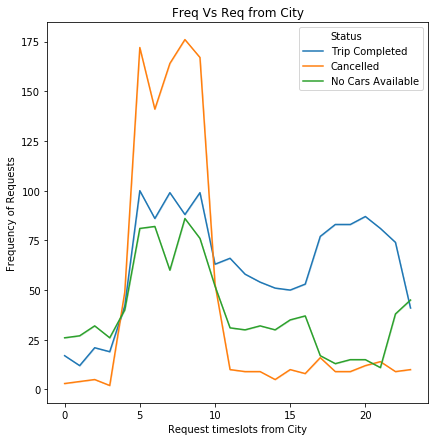

In [256]:
plt.figure(1,figsize=(15,7))
plt.subplot(1,2,1)
sns.lineplot(data=uber[(uber['Pickup point']=='City')],x='reqtime_slots',y='Request id',hue='Status',estimator=np.count_nonzero)
plt.title('Freq Vs Req from City for cancel and no cabs')
plt.xlabel('Request timeslots from city')
plt.ylabel('Frequency of Requests')
plt.show()
plt.figure(figsize=(15,7))
plt.subplot(122)
sns.lineplot(data=uber[(uber['Pickup point']=='City')],x='req_hour',y='Request id',hue='Status',estimator=np.count_nonzero)
plt.title('Freq Vs Req from City')
plt.xlabel('Request timeslots from City')
plt.ylabel('Frequency of Requests')
plt.show()

<h4>From the above graph we can say that No of requests from city-airport are highest in the early morning and morning.Along with that the no of cancellations from driver is highest during these time slots.</h4>
<li>This indicates pickup from city is facing cancellation issue.</li>

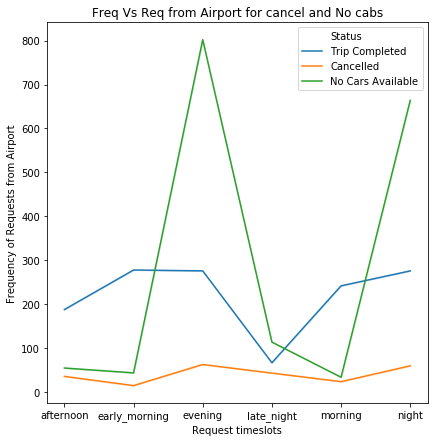

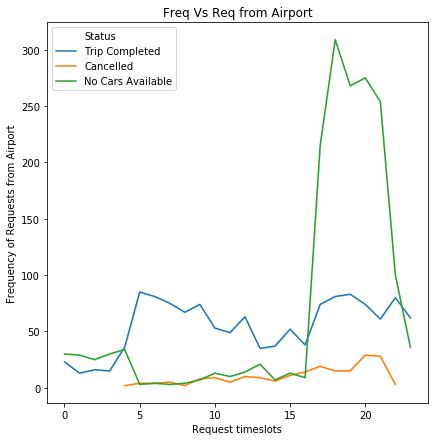

In [257]:
plt.figure(1,figsize=(15,7))
plt.subplot(1,2,1)
sns.lineplot(data=uber[(uber['Pickup point']=='Airport')],x='reqtime_slots',y='Request id',hue='Status',estimator=np.count_nonzero)
plt.title('Freq Vs Req from Airport for cancel and No cabs')
plt.xlabel('Request timeslots')
plt.ylabel('Frequency of Requests from Airport')
plt.show()
plt.figure(figsize=(15,7))
plt.subplot(122)
sns.lineplot(data=uber[(uber['Pickup point']=='Airport')],x='req_hour',y='Request id',hue='Status',estimator=np.count_nonzero)
plt.title('Freq Vs Req from Airport')
plt.xlabel('Request timeslots')
plt.ylabel('Frequency of Requests from Airport')
plt.show()

<h4>From the above graph we can say that No of requests from airport-city are highest in the evening and night.But the no of cabs available at that timeare very less or None.</h4>
<li>This indicates pickup from airport is facing insufficient cabs issue.</li>

Text(0,0.5,'Frequency of Requests')

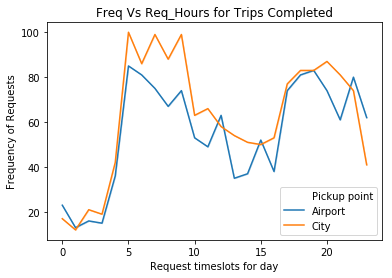

In [239]:
sns.lineplot(data=uber[uber['Status']=='Trip Completed'],x='req_hour',y='Request id',hue='Pickup point',estimator=np.count_nonzero)
plt.title('Freq Vs Req_Hours for Trips Completed')
plt.xlabel('Request timeslots for day')
plt.ylabel('Frequency of Requests')

- despite being the fact that cancellation during early morning and morning from city and no cabs available in the evening and night from airport,the frequency of trips completed are also higher during that time.

In [95]:
len(uber[(uber['Pickup point']=='Airport')&((uber['reqtime_slots']=='evening')|(uber['reqtime_slots']=='night'))&(uber['Status']=='No Cars Available')])

1466

- Total requests which got response as NO cabs available in evening and night from airport

In [108]:
len(uber[(uber['Pickup point']=='Airport')&((uber['reqtime_slots']=='evening')|(uber['reqtime_slots']=='night'))])

2141

- Total requests in evening and night from airport

In [110]:
(1466/2141)*100

68.47267631947688

- 68.5% of the trips do not get any cabs in the evening and night timeslots due to the shortage of cabs from Airport. 

In [113]:
len(uber[(uber['Pickup point']=='City')&((uber['reqtime_slots']=='morning')|(uber['reqtime_slots']=='early_morning'))&(uber['Status']=='Cancelled')])

932

- Total requests which got cancelled in morning and early morning from city

In [112]:
len(uber[(uber['Pickup point']=='City')&((uber['reqtime_slots']=='morning')|(uber['reqtime_slots']=='early_morning'))&(uber['Status']!='No Cars Available')])

1575

- Total requests from city in the morning and early morning except request for no cabs

In [114]:
(932/1575)*100

59.17460317460318

- despite being cabs 59% of the trips get cancelled in the morning and early morning from City

In [125]:
len(uber[(uber['Pickup point']=='Airport')&((uber['reqtime_slots']=='morning')|(uber['reqtime_slots']=='afternoon'))])

579

In [247]:
(579/2141)*100 #req in morning and afternoon/req in even and night

27.043437645959834

- 27% more requests in evening and night compared to morning and after noon from Airport

In [131]:
uber.head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_day,req_time,req_hour,drop_day,drop_time,drop_hour,reqtime_slots,droptime_slots
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11:51:00,11,11.0,13:00:00,13.0,morning,afternoon
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,11,17:57:00,17,11.0,18:47:00,18.0,evening,evening


In [139]:
trip_perdriver=pd.pivot_table(uber[uber['Status']=='Trip Completed'],index=['Driver id','req_day'],values=['Request id'],aggfunc=np.count_nonzero)

In [143]:
round(trip_perdriver['Request id'].sum()/len(trip_perdriver))

2.0

- from the above output we can see that each driver is completing 2 trips per day on an average.

In [210]:
uber[uber['Driver id']==1].sort_values(by='req_day').head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_day,req_time,req_hour,drop_day,drop_time,drop_hour,reqtime_slots,droptime_slots
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11:51:00,11,11.0,13:00:00,13.0,morning,afternoon
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,11,17:57:00,17,11.0,18:47:00,18.0,evening,evening


Text(0,0.5,'Drop Hour')

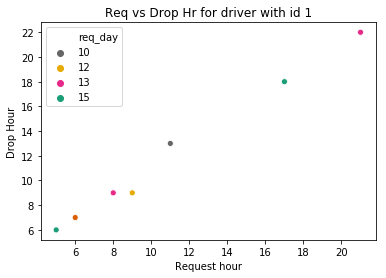

In [244]:
sns.scatterplot(data=uber[uber['Driver id']==1],x='req_hour',y='drop_hour',hue='req_day',palette='Dark2_r')
plt.title('Req vs Drop Hr for driver with id 1')
plt.xlabel('Request hour')
plt.ylabel('Drop Hour')

Text(0,0.5,'Drop Hour')

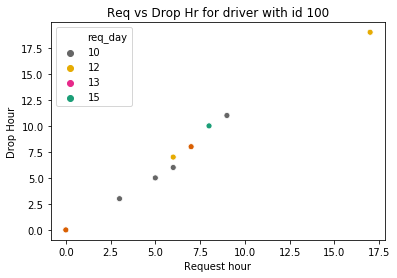

In [245]:
sns.scatterplot(data=uber[uber['Driver id']==100],x='req_hour',y='drop_hour',hue='req_day',palette='Dark2_r')
plt.title('Req vs Drop Hr for driver with id 100')
plt.xlabel('Request hour')
plt.ylabel('Drop Hour')

- we can see that distance between drop and next req is more and sometimes trip completed is just 1 in entire day

<h3>Problems Identified</h3>
<ol>
    <b><li>68.5% of the trips do not get any cabs in the evening and night timeslots due to the shortage of cabs from Airport.</li>
    <li>27% more requests in evening and night compared to morning and after noon from Airport</li>
    <li>Despite cabs being available 59% of the trips get cancelled in the morning and early morning from City</li>
    <li>Each driver is completing 2 trips per day on an average.</li></b>
</ol>
<h4>Clearly from the outputs we can see that airport is facing shortage of cabs in the evening and night time i,e from 4pm-12am and City has cabs cancellation problem in the early morning and morning i,e from 4am-12pm.</h4>


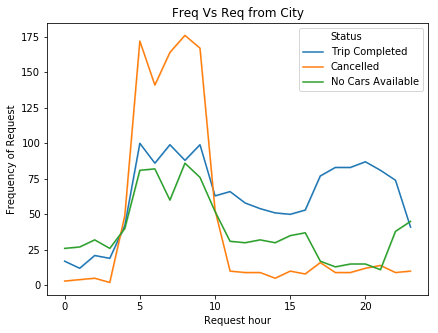

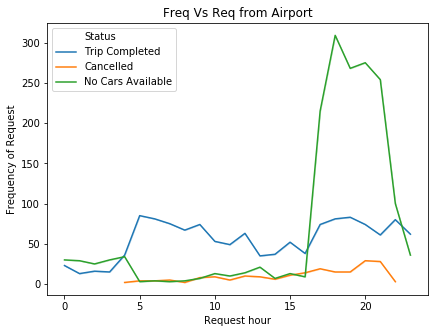

In [248]:
plt.figure(1,figsize=(15,5))
plt.subplot(121)
sns.lineplot(data=uber[uber['Pickup point']=='City'],x='req_hour',y='Request id',hue='Status',estimator=np.count_nonzero)
plt.title('Freq Vs Req from City')
plt.xlabel('Request hour')
plt.ylabel('Frequency of Request')
plt.show()
plt.figure(1,figsize=(15,5))
plt.subplot(122)
sns.lineplot(data=uber[uber['Pickup point']=='Airport'],x='req_hour',y='Request id',hue='Status',estimator=np.count_nonzero)
plt.title('Freq Vs Req from Airport')
plt.xlabel('Request hour')
plt.ylabel('Frequency of Request')
plt.show()

<h3>Why this Gap in demand and supply?</h3>
<br>
<li><b>If we see the above 2 graphs maximum no of requests from city are in the morning,early morning and from airport are in the evening,night execpt these timings requests at other time are very minimal</b></li>
<br>
<li><b>If we see trips that are completed from city and airport are also more in the early morning,morning,evening and night</b></li>
<br>
<li><b>We even know that on an average a person is completing 2 trips in a day,either he is cancelling requests or may be due to more wait time.</b></li>
<br>
<li><b>So we can say that whoever is going in the early morning or morning from city to airport will have to wait almost till evening or night to get request,this explains why so much cancellation from city at this time.Even some are considering this and going in these time slots hoping to get request in the afternoon which why the Trip completed status high in these slots.</b></li>
<br>
<li><b>From the Airport in the evening and night there are some cabs waiting who came in the afternoon and morning but the number cabs remaing are less,we are getting highest request in these time slots.So as the day goes requests increase but no cabs to supply and whatever cabs remaining will come back during these slots that's why we see more trips completed in these slots too.</b></li>

In [255]:
pd.pivot_table(uber,index=['req_hour'],values=['Request id'],aggfunc=np.count_nonzero).sort_values(by='Request id',ascending=False)

,Request id
req_hour,
18,510
20,492
19,473
21,449
5,445
9,431
8,423
17,418
7,406


<h3>What's the solution?</h3>
<b><li>Fix number of trips each driver has to complete,lets say 5 or 6.</li>
<li>If their is more than 2 hours of wait time then his target trip will reduce by 1.</li>
<li>If driver cancels more than 2 trips then his target will increase by 1.</li>
<li>As we have 300 cabs divide them and give the time slots for some drivers as early morning to afternoon and afternoon to late night.</li>
<li>Change the time slots alternatively,So the driver do not get bored.This cab be done weekly or every 15 days.</li>
</b>